In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('E:/portneuf/analysis/utils/'))
import trend_sen

In [21]:
df = pd.read_csv('gridMET_HUC12_monthly_stats.csv')

In [22]:
df['tmmn'] = df['tmmn'] - 273.15
df['tmmx'] = df['tmmx'] - 273.15
df['tmean'] = df[['tmmn', 'tmmx']].mean(axis=1)

In [24]:
df

,Date,huc12,pr,etr,tmmn,tmmx,tmean
0,1999-01-01,170402080608,39.060099,29.871449,-5.685159,2.423049,-1.631055
1,1999-01-01,170402080102,64.428112,25.744536,-7.654450,0.231969,-3.711241
2,1999-01-01,170402080104,102.146274,25.714261,-7.768679,-0.601728,-4.185203
3,1999-01-01,170402080106,53.634767,27.612401,-7.442584,-0.207157,-3.824871
4,1999-01-01,170402080107,45.239523,31.851244,-7.942996,0.459019,-3.741989
...,...,...,...,...,...,...,...
13795,2023-12-01,170402080401,65.066793,29.867497,-7.340612,2.147381,-2.596615
13796,2023-12-01,170402080403,84.826814,29.918535,-7.078321,1.851950,-2.613186
13797,2023-12-01,170402080205,68.954814,29.568637,-8.488046,1.056108,-3.715969
13798,2023-12-01,170402080402,97.918302,29.801979,-6.108928,1.953337,-2.077796


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13800 non-null  object 
 1   huc12   13800 non-null  int64  
 2   pr      13800 non-null  float64
 3   etr     13800 non-null  float64
 4   tmmn    13800 non-null  float64
 5   tmmx    13800 non-null  float64
 6   tmean   13800 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 754.8+ KB


In [26]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [27]:
df[['month', 'year', 'irr_year']] = df.apply(trend_sen.irr_year, axis=1, result_type='expand')

In [28]:
df = df[df['irr_year'] >= 2000]

In [29]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [31]:
df

,Date,huc12,pr,etr,tmmn,tmmx,tmean,month,year,irr_year
460,1999-11-01,170402080608,4.934370,87.441473,-2.684263,13.289965,5.302851,11,1999,2000
461,1999-11-01,170402080102,18.396361,86.560666,-3.157415,10.950860,3.896722,11,1999,2000
462,1999-11-01,170402080104,30.486638,87.843561,-2.533464,9.674634,3.570585,11,1999,2000
463,1999-11-01,170402080106,14.687336,90.780703,-2.798977,10.611970,3.906496,11,1999,2000
464,1999-11-01,170402080107,11.662606,95.735736,-3.547782,11.101327,3.776773,11,1999,2000
...,...,...,...,...,...,...,...,...,...,...
13795,2023-12-01,170402080401,65.066793,29.867497,-7.340612,2.147381,-2.596615,12,2023,2024
13796,2023-12-01,170402080403,84.826814,29.918535,-7.078321,1.851950,-2.613186,12,2023,2024
13797,2023-12-01,170402080205,68.954814,29.568637,-8.488046,1.056108,-3.715969,12,2023,2024
13798,2023-12-01,170402080402,97.918302,29.801979,-6.108928,1.953337,-2.077796,12,2023,2024


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13340 entries, 460 to 13799
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      13340 non-null  datetime64[ns]
 1   huc12     13340 non-null  int64         
 2   pr        13340 non-null  float64       
 3   etr       13340 non-null  float64       
 4   tmmn      13340 non-null  float64       
 5   tmmx      13340 non-null  float64       
 6   tmean     13340 non-null  float64       
 7   month     13340 non-null  int64         
 8   year      13340 non-null  int64         
 9   irr_year  13340 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 1.1 MB


In [32]:
df.columns

Index(['Date', 'huc12', 'pr', 'etr', 'tmmn', 'tmmx', 'tmean', 'month', 'year',
       'irr_year'],
      dtype='object')

In [37]:
var_cols = ['pr', 'etr', 'tmmn', 'tmmx', 'tmean']
et_model_names = {
'pr': ' Precip',
'etr': 'Evaporative demand (tall)',
'tmean': 'Mean temp',
'tmmn': 'Min. temp',
'tmmx': 'Max.temp',
}

In [45]:
df_irr_yr = df.groupby(['huc12', 'irr_year',]).agg(
    pr = ('pr', 'sum'),
    etr = ('etr', 'sum'),
    tmmx = ('tmmx', 'mean'),
    tmmn = ('tmmn', 'mean'),
    tmean = ('tmean', 'mean'),
).reset_index()

df_cs_yr = df_cs.groupby(['huc12', 'year',]).agg(
    pr = ('pr', 'sum'),
    etr = ('etr', 'sum'),
    tmmx = ('tmmx', 'mean'),
    tmmn = ('tmmn', 'mean'),
    tmean = ('tmean', 'mean'),
).reset_index()

df_non_cs_yr = df_non_cs.groupby(['huc12', 'year',]).agg(
    pr = ('pr', 'sum'),
    etr = ('etr', 'sum'),
    tmmx = ('tmmx', 'mean'),
    tmmn = ('tmmn', 'mean'),
    tmean = ('tmean', 'mean'),
).reset_index()

In [46]:
df_cs_yr

,huc12,year,pr,etr,tmmx,tmmn,tmean
0,170402080101,2000,184.384434,1364.652568,21.266315,5.204168,13.235241
1,170402080101,2001,144.011899,1399.953515,21.817785,5.504125,13.660955
2,170402080101,2002,210.896537,1302.880482,20.263736,4.730184,12.496960
3,170402080101,2003,154.271511,1350.447816,21.640362,5.704066,13.672214
4,170402080101,2004,326.702124,1179.848007,19.574794,5.271159,12.422977
...,...,...,...,...,...,...,...
1099,170402080608,2019,168.515912,1365.932066,21.974593,5.555615,13.765104
1100,170402080608,2020,135.593797,1427.873929,23.486618,5.784129,14.635373
1101,170402080608,2021,149.494366,1456.209500,24.285064,7.096209,15.690637
1102,170402080608,2022,153.523554,1357.858316,23.562528,6.280236,14.921382


In [47]:
# crop season trend analysis
trend_df_cs = trend_sen.analyze_trends(df_cs_yr, var_list = var_cols, sort_yr='year') 

In [55]:
trend_df_cs

,huc12,pr_slope,pr_p,pr_trend,etr_slope,etr_p,etr_trend,tmmn_slope,tmmn_p,tmmn_trend,tmmx_slope,tmmx_p,tmmx_trend,tmean_slope,tmean_p,tmean_trend
0,170402080101,3.635731,0.096534,no trend,-4.228261,0.130262,no trend,0.035905,0.143342,no trend,-0.034437,0.309163,no trend,0.000526,1.000000,no trend
1,170402080102,3.557324,0.118128,no trend,-4.317625,0.106900,no trend,0.032970,0.188633,no trend,-0.033898,0.243693,no trend,-0.002059,0.901298,no trend
2,170402080103,5.244392,0.062839,no trend,-4.676828,0.070184,no trend,-0.000362,0.980211,no trend,-0.046962,0.157406,no trend,-0.021419,0.358743,no trend
3,170402080104,4.636374,0.086988,no trend,-4.718545,0.086988,no trend,0.007789,0.784970,no trend,-0.035778,0.224208,no trend,-0.015480,0.441931,no trend
4,170402080105,3.108619,0.172491,no trend,-5.449177,0.078219,no trend,0.028774,0.224208,no trend,-0.043746,0.205863,no trend,-0.011022,0.602442,no trend
5,170402080106,3.082043,0.143342,no trend,-5.014993,0.086988,no trend,0.033416,0.157406,no trend,-0.040002,0.224208,no trend,-0.003644,0.823349,no trend
6,170402080107,3.105719,0.143342,no trend,-5.795132,0.056141,no trend,0.030882,0.143342,no trend,-0.045719,0.205863,no trend,-0.009919,0.747106,no trend
7,170402080108,3.799053,0.106900,no trend,-5.969377,0.050049,no trend,0.017747,0.333358,no trend,-0.051613,0.118128,no trend,-0.024030,0.286157,no trend
8,170402080201,3.350337,0.086988,no trend,-4.832768,0.086988,no trend,0.022952,0.224208,no trend,-0.043007,0.143342,no trend,-0.004999,0.901298,no trend
9,170402080202,3.201986,0.130262,no trend,-6.493961,0.023996,decreasing,0.024234,0.286157,no trend,-0.058917,0.078219,no trend,-0.015614,0.503037,no trend


In [48]:
summary_df_cs = trend_sen.summarize_trends(trend_df_cs, var_cols)
summary_df_cs

,Variable,Increasing,Decreasing,No Trend
0,pr,0,0,46
1,etr,0,8,38
2,tmmn,0,1,45
3,tmmx,0,1,45
4,tmean,0,2,44


In [52]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [53]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df_cs['huc12'] = trend_df_cs['huc12'].astype(str)

In [54]:
merged_gdf_cs = gdf.merge(trend_df_cs, on='huc12',)

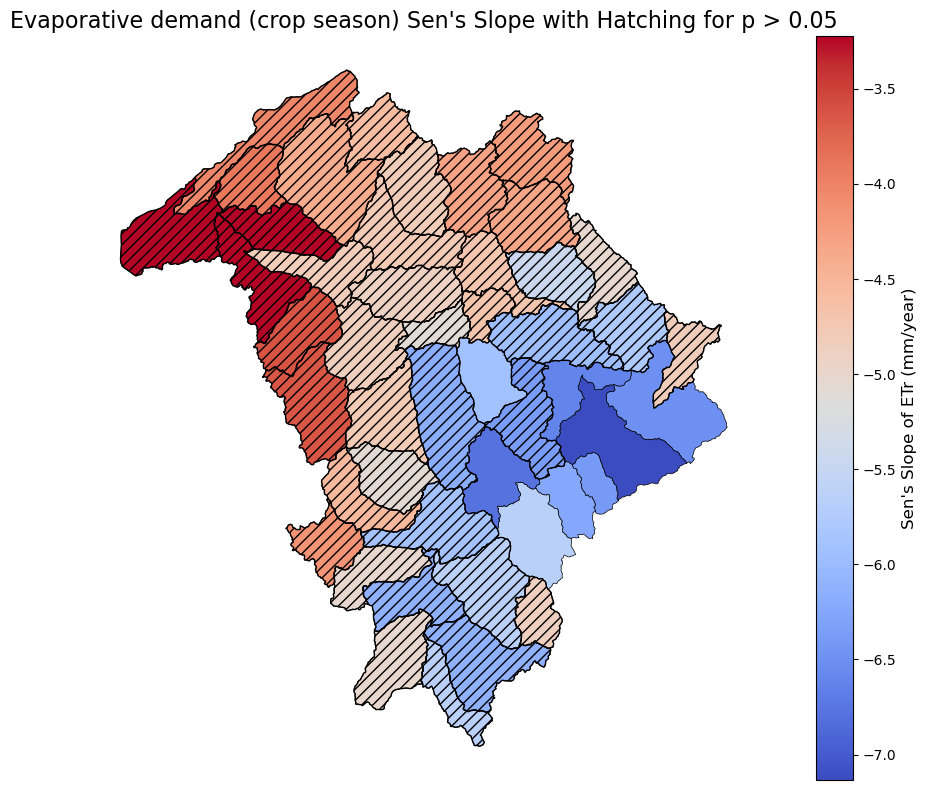

In [56]:
trend_sen.plot_trend_map(
    gdf=merged_gdf_cs,
    slope_col='etr_slope',
    pval_col='etr_p',
    title="Evaporative demand (crop season) Sen's Slope with Hatching for p > 0.05",
    cbar_label="Sen's Slope of ETr (mm/year)",
    vmin=None,
    vmax=None,
    hatch_pattern='///',
    significance_level=0.05,
    figsize=(12, 8),
    cmap='coolwarm',
    save_path=None
)

In [57]:
trend_df_cs.to_csv('trend_gmet.csv', index=False)